<center><h1>Pre procesamiento de Datos</h1></center>

In [16]:
#Importar la libreria para manipulación de datos
import pandas as pd
#Importar la libreria para realizar calculos avanzados
import numpy as np
#Importar la libreria para realizar graficos
import matplotlib.pyplot as plt

In [2]:
# Obtener el DataSet e mostrar el contenido
df = pd.read_csv("data_act_01.csv",sep=";")
df.sample(5)

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,Range,AddressType
8271,160952742,Trespasser,2016-04-04T00:00:00,16:36,2016-04-04T16:36:00,GOA,2900 Block Of 3rd St,San Francisco,CA,1,NaN,Premise Address
5342,160941356,22500e,2016-04-03T00:00:00,10:48,2016-04-03T10:48:00,CIT,300 Block Of Moraga St,San Francisco,CA,1,NaN,Premise Address
8218,160952633,Fight No Weapon,2016-04-04T00:00:00,16:11,2016-04-04T16:11:00,HAN,400 Block Of Golden Gate Av,San Francisco,CA,1,NaN,Premise Address
4875,160940536,915,2016-04-03T00:00:00,3:36,2016-04-03T03:36:00,GOA,1000 Block Of Ocean Av,San Francisco,CA,1,NaN,Premise Address
4601,160940048,Music,2016-04-03T00:00:00,0:15,2016-04-03T00:15:00,ADV,700 Block Of University St,San Francisco,CA,1,NaN,Premise Address


In [3]:
#Observar el tipo de variables que contiene el objeto
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CrimeId                10051 non-null  int64  
 1   OriginalCrimeTypeName  10051 non-null  object 
 2   OffenseDate            10051 non-null  object 
 3   CallTime               10051 non-null  object 
 4   CallDateTime           10051 non-null  object 
 5   Disposition            10051 non-null  object 
 6   Address                10051 non-null  object 
 7   City                   9730 non-null   object 
 8   State                  10048 non-null  object 
 9   AgencyId               10051 non-null  object 
 10  Range                  0 non-null      float64
 11  AddressType            10051 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 942.4+ KB


# Detección de valores nulos o perdidos

In [4]:
df.isnull().sum()

CrimeId                      0
OriginalCrimeTypeName        0
OffenseDate                  0
CallTime                     0
CallDateTime                 0
Disposition                  0
Address                      0
City                       321
State                        3
AgencyId                     0
Range                    10051
AddressType                  0
dtype: int64

# Eliminar el Rango considerando dispone datos nulos

In [5]:
df = df.drop(['Range'], axis=1)
df.sample(5)

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,AddressType
354,160920431,Passing Call,2016-04-01T00:00:00,5:27,2016-04-01T05:27:00,HAN,0 Block Of United Nations Pz,San Francisco,CA,1,Common Location
5536,160941696,Auto Boost / Strip,2016-04-03T00:00:00,12:24,2016-04-03T12:24:00,ND,Fulton St/stanyan St,San Francisco,CA,1,Intersection
6730,160943773,Auto Boost / Strip,2016-04-03T00:00:00,23:34,2016-04-03T23:34:00,REP,2500 Block Of Mason St,San Francisco,CA,1,Premise Address
8101,160952415,Suspicious Person,2016-04-04T00:00:00,15:17,2016-04-04T15:17:00,HAN,200 Block Of Beaumont Av,San Francisco,CA,1,Premise Address
8925,160953988,Passing Call,2016-04-04T00:00:00,22:31,2016-04-04T22:31:00,HAN,875 36th Ave,NaN,CA,1,Geo-Override


# Controlar valores perdidos o nulos

In [6]:
df = df.dropna()
df

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,AddressType
0,160903280,Assault / Battery,2016-03-30T00:00:00,18:42,2016-03-30T18:42:00,REP,100 Block Of Chilton Av,San Francisco,CA,1,Premise Address
1,160912272,Homeless Complaint,2016-03-31T00:00:00,15:31,2016-03-31T15:31:00,GOA,2300 Block Of Market St,San Francisco,CA,1,Premise Address
2,160912590,Susp Info,2016-03-31T00:00:00,16:49,2016-03-31T16:49:00,GOA,2300 Block Of Market St,San Francisco,CA,1,Premise Address
3,160912801,Report,2016-03-31T00:00:00,17:38,2016-03-31T17:38:00,GOA,500 Block Of 7th St,San Francisco,CA,1,Premise Address
4,160912811,594,2016-03-31T00:00:00,17:42,2016-03-31T17:42:00,REP,Beale St/bryant St,San Francisco,CA,1,Intersection
...,...,...,...,...,...,...,...,...,...,...,...
10046,160964210,Well Being Check,2016-04-05T00:00:00,23:38,2016-04-05T23:38:00,GOA,Hollister Av/hawes St,San Francisco,CA,1,Intersection
10047,160964216,Traffic Stop,2016-04-05T00:00:00,23:43,2016-04-05T23:43:00,ADV,California St/mason St,San Francisco,CA,1,Intersection
10048,160964227,Traffic Stop,2016-04-05T00:00:00,23:48,2016-04-05T23:48:00,CIT,Rosella Ct/onondaga Av,San Francisco,CA,1,Intersection
10049,160964229,Passing Call,2016-04-05T00:00:00,23:48,2016-04-05T23:48:00,Not recorded,0 Blk Herbst Rd,San Francisco,CA,1,Geo-Override


# Verificar filas duplicadas

In [7]:
#Verificar si existe datos duplicados
print("CrimeId: ",df['CrimeId'].duplicated().sum())

CrimeId:  4


In [13]:
df.drop_duplicates(inplace=True)
df

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,AddressType
0,160903280.0,Assault / Battery,2016-03-30T00:00:00,18:42,2016-03-30T18:42:00,REP,100 Block Of Chilton Av,San Francisco,CA,1,Premise Address
1,160912272.0,Homeless Complaint,2016-03-31T00:00:00,15:31,2016-03-31T15:31:00,GOA,2300 Block Of Market St,San Francisco,CA,1,Premise Address
2,160912590.0,Susp Info,2016-03-31T00:00:00,16:49,2016-03-31T16:49:00,GOA,2300 Block Of Market St,San Francisco,CA,1,Premise Address
3,160912801.0,Report,2016-03-31T00:00:00,17:38,2016-03-31T17:38:00,GOA,500 Block Of 7th St,San Francisco,CA,1,Premise Address
4,160912811.0,594,2016-03-31T00:00:00,17:42,2016-03-31T17:42:00,REP,Beale St/bryant St,San Francisco,CA,1,Intersection
...,...,...,...,...,...,...,...,...,...,...,...
10046,160964210.0,Well Being Check,2016-04-05T00:00:00,23:38,2016-04-05T23:38:00,GOA,Hollister Av/hawes St,San Francisco,CA,1,Intersection
10047,160964216.0,Traffic Stop,2016-04-05T00:00:00,23:43,2016-04-05T23:43:00,ADV,California St/mason St,San Francisco,CA,1,Intersection
10048,160964227.0,Traffic Stop,2016-04-05T00:00:00,23:48,2016-04-05T23:48:00,CIT,Rosella Ct/onondaga Av,San Francisco,CA,1,Intersection
10049,160964229.0,Passing Call,2016-04-05T00:00:00,23:48,2016-04-05T23:48:00,Not recorded,0 Blk Herbst Rd,San Francisco,CA,1,Geo-Override


In [14]:
print("CrimeId: ",df['CrimeId'].duplicated().sum())

CrimeId:  3


# Controlar la redundancia en fechas

In [17]:
df = df.drop(['OffenseDate'], axis=1)
df.sample(5)

,CrimeId,OriginalCrimeTypeName,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,AddressType
2025,160923607.0,245,21:44,2016-04-01T21:44:00,REP,1000 Block Of Union St,San Francisco,CA,1,Premise Address
2751,160930763.0,22500e,7:59,2016-04-02T07:59:00,GOA,0 Block Of Bay View St,San Francisco,CA,1,Premise Address
5013,160940825.0,Meet W/citizen,7:30,2016-04-03T07:30:00,HAN,10th Av/irving St,San Francisco,CA,1,Intersection
166,160920114.0,Encampment,1:05,2016-04-01T01:05:00,HAN,16th St/folsom St,San Francisco,CA,1,Intersection
4049,160933092.0,Muni Inspection,19:24,2016-04-02T19:24:00,HAN,900 Block Of Market St,San Francisco,CA,1,Common Location


In [19]:
df = df.drop(['CallTime'], axis=1)
df.sample(5)

,CrimeId,OriginalCrimeTypeName,CallDateTime,Disposition,Address,City,State,AgencyId,AddressType
1351,160922379.0,601,2016-04-01T16:03:00,GOA,300 Block Of Golden Gate Av,San Francisco,CA,1,Premise Address
1299,160922283.0,Auto Boost / Strip,2016-04-01T15:38:00,REP,400 Block Of Irwin St,San Francisco,CA,1,Premise Address
4108,160933210.0,Encampment,2016-04-02T19:52:00,ADV,Castro St/17th St,San Francisco,CA,1,Intersection
8557,160953270.0,Passing Call,2016-04-04T18:47:00,HAN,Sunnydale Av/santos St,San Francisco,CA,1,Intersection
1484,160922611.0,Passing Call,2016-04-01T17:02:00,Not recorded,900 Block Of Market St,San Francisco,CA,1,Common Location


# Control de las fechas mediante Outliers

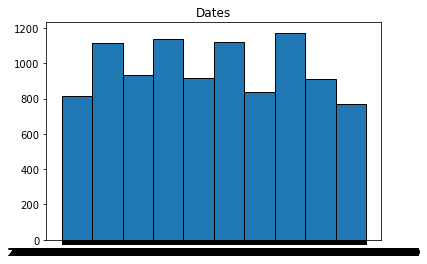

In [20]:
plt.title('Dates')
plt.hist(df['CallDateTime'],edgecolor='black',linewidth=1)
plt.show()

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

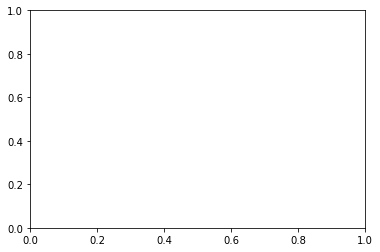

In [22]:
plt.boxplot(df['CallDateTime'], vert=False)
plt.show()

# 